<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Found-proteins-with-canonical-motifs" data-toc-modified-id="Found-proteins-with-canonical-motifs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Found proteins with canonical motifs</a></span><ul class="toc-item"><li><span><a href="#Known-identified-with-canonical-motif" data-toc-modified-id="Known-identified-with-canonical-motif-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Known identified with canonical motif</a></span></li><li><span><a href="#Novel-identified-with-canonical-motif" data-toc-modified-id="Novel-identified-with-canonical-motif-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Novel identified with canonical motif</a></span></li></ul></li><li><span><a href="#Found-proteins-with-new-C-terminal-motifs" data-toc-modified-id="Found-proteins-with-new-C-terminal-motifs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Found proteins with new C-terminal motifs</a></span></li><li><span><a href="#Found-proteins-with-internal-cysteines-only" data-toc-modified-id="Found-proteins-with-internal-cysteines-only-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Found proteins with internal cysteines only</a></span><ul class="toc-item"><li><span><a href="#Characterize-internally-prenylated-proteins" data-toc-modified-id="Characterize-internally-prenylated-proteins-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Characterize internally prenylated proteins</a></span></li></ul></li><li><span><a href="#Create-barplots-to-show-distribution-on-the-various-prenylation-motifs" data-toc-modified-id="Create-barplots-to-show-distribution-on-the-various-prenylation-motifs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create barplots to show distribution on the various prenylation motifs</a></span><ul class="toc-item"><li><span><a href="#Known-identified-pernylated-proteins" data-toc-modified-id="Known-identified-pernylated-proteins-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Known identified pernylated proteins</a></span></li><li><span><a href="#New-identified-pernylated-proteins" data-toc-modified-id="New-identified-pernylated-proteins-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>New identified pernylated proteins</a></span></li></ul></li><li><span><a href="#Sequence-logos" data-toc-modified-id="Sequence-logos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sequence logos</a></span></li></ul></div>

In [1]:
import sys
import os
import session_info

# Add the '0_functions' folder to sys.path
sys.path.append(os.path.join(os.getcwd(), '..', '0_functions'))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from plots import plot_grouped_bar_chart
import dataframe_image as dfi

In [3]:
# Display session information
session_info.show()

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
datafolder = 'data'
known_proteins_datafolder = '../Known_prenylated_proteins/data'
figures = 'data/figures'
PSSMSearch = 'data/PssmSearch'

In [6]:
# Load data

# All identified prenylated proteins that contain a cysteine
all_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_all_motif.csv'), sep=',')
known_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_known.csv'), sep=',')
novel_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_novel_motif.csv'), sep=',')

# clean FASTA file of all identified proteins
fasta = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'final_fasta_seqs_identified_prots.csv'), sep=',')

##### Sequence motifs in identified prenylated proteins

In [7]:
found_canon = all_found[all_found['motif'].isin(['CAAX', 'CXXX', 'CCXXX', 'CCXX', 'CCX', 'CXC', 'CC', 'C'])]
found_newCterm = all_found[all_found['motif'].isin(['CXXXX', 'CXX', 'CX', 'CCC'])]
found_internal = all_found[all_found['motif'] == 'internal']

In [8]:
print('Canonical motif:', len(found_canon), ', New-C-terminal motif:', len(found_newCterm), ', Internal cysteines:', len(found_internal))
print('Total:', len(found_canon)+ len(found_newCterm)+ len(found_internal))

Canonical motif: 43 , New-C-terminal motif: 0 , Internal cysteines: 6
Total: 49


# Found proteins with internal cysteines only

In [9]:
print('Out of ', len(all_found), ' identified prenylated proteins ', round(len(found_internal) * 100 / len(all_found), 1), '% have no C-terminal cysteines. ', len(found_internal), '\n', sep='')

Out of 49 identified prenylated proteins 12.2% have no C-terminal cysteines. 6



In [10]:
# save internally prenylated F and GG (for RQ5)
found_internal.to_csv(os.path.join(datafolder, 'identified_proteins', 'internal_F.csv'), sep=',', index=False)

## Characterize internally prenylated proteins

In [11]:
internal_F_UP = found_internal
internal_GG_UP = pd.DataFrame([], columns=['ID', 'name', 'fullName', 'substrate', 'location', 'moiety',
       'AminoAcid', 'position', 'evidenceCode', 'publication',
       'ProteinEntryReviewed', 'Exp_moiety', 'motif'])
internal_F_GG_UP = pd.DataFrame([], columns=['ID', 'name', 'fullName', 'substrate', 'location', 'moiety',
       'AminoAcid', 'position', 'evidenceCode', 'publication',
       'ProteinEntryReviewed', 'Exp_moiety', 'motif'])

In [12]:
dataframes = ['F', 'GG', 'F_GG']

# Create an empty DataFrame with the desired index
index_columns = ['name', 'substrate', 'location', 'moiety']
table_known = pd.DataFrame(index=dataframes, columns=index_columns)

for frame in dataframes:
    if frame == 'F':
        df = pd.DataFrame(internal_F_UP)
    elif frame == 'GG':
        df = pd.DataFrame(internal_GG_UP)
    elif frame == 'F_GG':
        df = pd.DataFrame(internal_F_GG_UP)
        
    X_name = len(df['name'])
    df['substrate'] = df['substrate'].fillna(df['name'])
    X_substr = df['substrate'].value_counts().reset_index().values
    X_substr = '\n'.join([f"{item[0]}, {item[1]}" for item in X_substr])
    X_location = df['location'].explode(ignore_index=True).value_counts().reset_index().values
    X_location = '\n'.join([f"{item[0]}, {item[1]}" for item in X_location])
    X_moiety = df['moiety'].explode(ignore_index=True).value_counts().reset_index().values
    X_moiety = '\n'.join([f"{item[0]}, {item[1]}" for item in X_moiety])

    
    d = pd.DataFrame({
        'number': [X_name], 'substrate': [X_substr],
        'location': [X_location], 'moiety': [X_moiety]
    }, index=[frame])
    
    table_known.loc[frame] = d.values

table_transposed = table_known.transpose()

# Format the DataFrame to display newline characters as line breaks
df_styled = table_transposed.style.set_properties(**{'white-space': 'pre-wrap'})

# Display the DataFrame
df_styled

,F,GG,F_GG
name,6,0,0
substrate,"SUI1, 1 importin alpha, 1 PMG, 1 SPART, 1 WBP2, 1 peptidase M14, 1",,
location,"Cytoplasm, 1 Membrane, 1 ['Cytoplasm', 'Midbody'], 1 ['Cytoplasm', 'Nucleus'], 1 Secreted, 1",,
moiety,,,


In [13]:
# save
dfi.export(df_styled, (os.path.join(datafolder, 'figures', 'ident_internal_UP.png')), max_rows=-1)

C:\Program Files\Google\Chrome\Application\chrome.exe


# Create barplots to show distribution on the various prenylation motifs

In [14]:
canon_known_F = known_found[known_found['moiety'].str.contains("farnesyl")].reset_index(drop=True)
canon_known_GG = known_found[known_found['moiety'].str.contains("geranylgeranyl")].reset_index(drop=True)

canon_novel_F = novel_found[novel_found['motif'].isin(("CXXX", "CAAX", "CXC", "CCX", "CC", "C"))].reset_index(drop=True)

internal = novel_found[novel_found['motif'].isin(['internal'])].reset_index(drop=True)

In [15]:
print('F canon known identified: ', len(canon_known_F), ', GG canon known identified: ', len(canon_known_GG), sep='')
print('F canon novel identified: ', len(canon_novel_F))
print('F newCterm novel identified: ', len(found_newCterm))
print('F internal novel identified: ', len(internal), sep='')

F canon known identified: 28, GG canon known identified: 3
F canon novel identified:  12
F newCterm novel identified:  0
F internal novel identified: 6


In [16]:
# Remember, that we found known prenylated proteins, but with a different moiety than in UniProt

canon_known = pd.concat([canon_known_F, canon_known_GG]).drop_duplicates().reset_index(drop=True)
mismatch = canon_known[canon_known['moiety'] != canon_known['Exp_moiety']].reset_index(drop=True)

mismatch.to_csv(os.path.join(datafolder, 'identified_proteins', 'moiety_mismatch.csv'), sep=',', index=False)

dfi.export(mismatch, (os.path.join(datafolder, 'figures', 'moiety_mismatch.png')))

C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe


In [17]:
mismatch

,ID,name,fullName,substrate,location,moiety,AminoAcid,position,evidenceCode,publication,ProteinEntryReviewed,motif,pep,Exp_moiety
0,Q15669,RHOH,Rho-related GTP-binding protein RhoH,Rho,Membrane,S-geranylgeranyl cysteine,C,-4,ECO_0000250,NaN,True,CXXX,LFSINECKIF,S-farnesyl cysteine
1,Q8WV99,ZFN2B,AN1-type zinc finger protein 2B,ZFN2B,Membrane,S-geranylgeranyl cysteine,C,-4,ECO_0000250,NaN,True,CXXX,SSKPSNCSLC,S-farnesyl cysteine
2,Q9Y3L5,RAP2C,Ras-related protein Rap-2c,Ras,Membrane,S-geranylgeranyl cysteine,C,-4,ECO_0000250,NaN,True,CAAX,DQCCTTCVVQ,S-farnesyl cysteine


In [18]:
# List of known DataFrames with their names
known_dfs = [
    ('canon_known_F', canon_known_F),
    ('canon_known_GG', canon_known_GG),
    ('canon_novel_F', canon_novel_F),
]

# Iterate through each DataFrame
for df_name, df in known_dfs:
    # Calculate motif counts and normalized frequencies
    motif_counts = df['motif'].value_counts()
    normalized_frequencies = (motif_counts / (len(all_found)) * 100).round(1).astype(str) + '%'

    # Create a DataFrame for the counts and frequencies
    motif_counts_df = pd.DataFrame({
        'motif': motif_counts.index,
        'count': motif_counts.values,
        'frequency': normalized_frequencies
    })

    # Aggregate names
    name_agg = df.groupby('motif')['name'].agg(lambda x: sorted(list(x)) if len(x) > 1 else x.iloc[0]).reset_index()

    # Reset index for both DataFrames to avoid merge ambiguity
    motif_counts_df.reset_index(drop=True, inplace=True)
    name_agg.reset_index(drop=True, inplace=True)

    # Merge the counts and names
    combined_df = pd.merge(motif_counts_df, name_agg, on='motif', how='inner')

    # Print the name of the DataFrame
    print(f"Results for {df_name}:")
    
    # Display the combined DataFrame
    display(combined_df)


Results for canon_known_F:


,motif,count,frequency,name
0,CXXX,19,38.8%,"[BROX, CENPF, CEP85, DCAF8, DNJA1, DNJA2, DNJA4, DPCD, GBP1, LMNA, LMNB2, LRRF1, NP1L1, NP1L4, RAP2A, RHEB, TP4A1, TP4A2, ULK3]"
1,CAAX,9,18.4%,"[GBGT2, LMNB1, PEX19, RAB28, RASH, RASK, RASN, RRAS2, YKT6]"


Results for canon_known_GG:


,motif,count,frequency,name
0,CXXX,2,4.1%,"[RHOH, ZFN2B]"
1,CAAX,1,2.0%,RAP2C


Results for canon_novel_F:


,motif,count,frequency,name
0,CXXX,7,14.3%,"[APOL3, CE85L, F219A, MAPK3, RIC1, SPDLY, WDTC1]"
1,CAAX,4,8.2%,"[EH1L1, EHBP1, INF2, PRIC3]"
2,C,1,2.0%,RBGP1


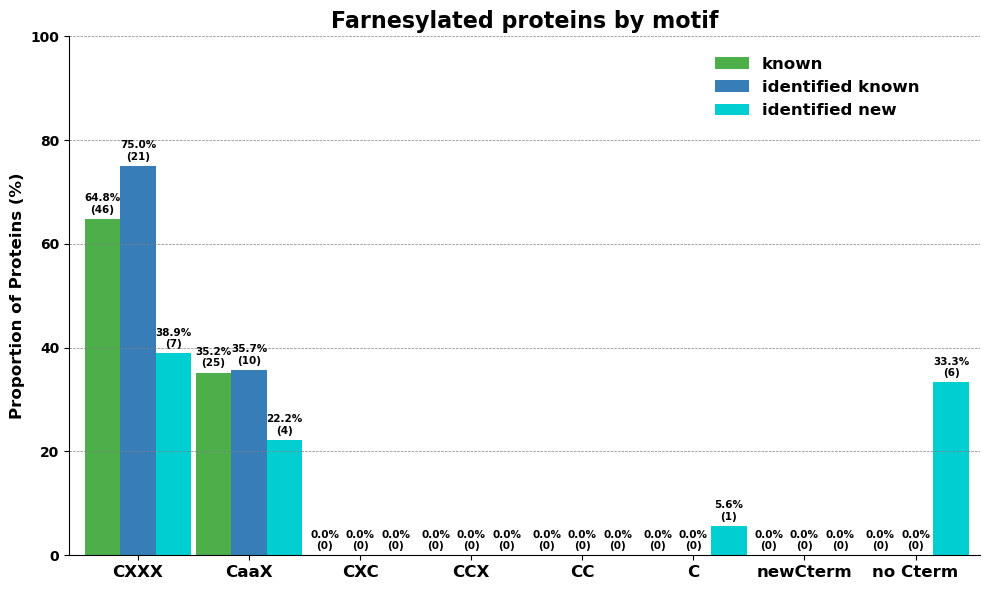

In [19]:
motifs = ("CXXX", "CaaX", "CXC", "CCX", "CC", "C", "newCterm", "no Cterm")

# Define group counts for known, identified known, and novel identified
group_counts = {
    'known': [46, 25, 0, 0, 0, 0, 0, 0],  
    'identified known': [21, 10, 0, 0, 0, 0, 0, 0],
    'identified new': [7, 4, 0, 0, 0, 1, 0, 6]
}

# Proportion calculation (assuming `F_found` and `F_GG_found` are defined)
group_proportions = group_counts.copy()
for attribute, measurement in group_proportions.items():
    if attribute == 'known':
        group_proportions[attribute] = [ round(x/(sum(measurement))*100,1) for x in measurement ]
    if attribute == 'identified known':
        group_proportions[attribute] = [ round(x/(len(canon_known_F))*100,1) for x in measurement ]
    if attribute == 'identified new':
        group_proportions[attribute] = [ round(x/(len(novel_found))*100,1) for x in measurement ]  

# Update labels with counts and percentages
group_labels = group_counts.copy()
for attribute, measurement in group_labels.items():
    group_labels[attribute] = [ str(prop)+"%\n("+str(count)+")" for (prop, count) in zip(group_proportions[attribute],group_counts[attribute]) ]

# Call the updated plotting function
plot_grouped_bar_chart(motifs, group_proportions, group_labels, 'Farnesylated proteins by motif')

plt.tight_layout()
plt.savefig(os.path.join(figures, 'F_motifs.pdf'), dpi=300)
plt.show()

# Sequence logos

## Canonical motif, known

In [20]:
# Save peptides for PSSMSearch

motif_counts = canon_known_F['motif'].value_counts()

for motif, count in motif_counts.items():
    filtered_peps = canon_known_F['pep'][canon_known_F['motif'] == motif]
    filename = f'F_Cterm_known_{motif}.txt'
    filtered_peps.to_csv(os.path.join(PSSMSearch, 'Cterm', 'known_canon', filename), header=None, index=None, sep=' ')
    print(f"{count}\t{motif}\t{filename}")

19	CXXX	F_Cterm_known_CXXX.txt
9	CAAX	F_Cterm_known_CAAX.txt


In [21]:
# Save peptides for PSSMSearch

motif_counts = canon_known_GG['motif'].value_counts()

for motif, count in motif_counts.items():
    filtered_peps = canon_known_GG['pep'][canon_known_GG['motif'] == motif]
    filename = f'GG_Cterm_known_{motif}.txt'
    filtered_peps.to_csv(os.path.join(PSSMSearch, 'Cterm', 'known_canon', filename), header=None, index=None, sep=' ')
    print(f"{count}\t{motif}\t{filename}")

2	CXXX	GG_Cterm_known_CXXX.txt
1	CAAX	GG_Cterm_known_CAAX.txt


## Canonical motif, new

In [22]:
# Save peptides for PSSMSearch

motif_counts = canon_novel_F['motif'].value_counts()

for motif, count in motif_counts.items():
    filtered_peps = canon_novel_F['pep'][canon_novel_F['motif'] == motif]
    filename = f'F_Cterm_new_{motif}.txt'
    filtered_peps.to_csv(os.path.join(PSSMSearch, 'Cterm', 'new_canon', filename), header=None, index=None, sep=' ')
    print(f"{count}\t{motif}\t{filename}")

7	CXXX	F_Cterm_new_CXXX.txt
4	CAAX	F_Cterm_new_CAAX.txt
1	C	F_Cterm_new_C.txt


## Canonical motif, all

In [23]:
# Save peptides for PSSMSearch

motif_counts = found_canon['motif'].value_counts()

for motif, count in motif_counts.items():
    filtered_peps = found_canon['pep'][found_canon['motif'] == motif]
    filename = f'F_Cterm_all_{motif}.txt'
    filtered_peps.to_csv(os.path.join(PSSMSearch, 'Cterm', 'all_canon', filename), header=None, index=None, sep=' ')
    print(f"{count}\t{motif}\t{filename}")

28	CXXX	F_Cterm_all_CXXX.txt
14	CAAX	F_Cterm_all_CAAX.txt
1	C	F_Cterm_all_C.txt
